In [1]:
# K-Means Clustering

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#importing the dataset
data = pd.read_csv('data.csv', header=None)

In [4]:
#rename columns
d = data.copy()
d.columns = ["q{}".format(i+1) for i in range(len(d.columns))]
columns_real = ["q309", "q311", "q319", "q24", "q298", "q165", "q25", "q62"] #"q119"]
names = {
    "q309": "Sex", "q165": "Religion",
    "q311": "Age", "q319": "Education",
    "q24": "Satisfaction_with_life",
    "q25": "Interpersonal_trust",
    "q298": "Employment_status",
    "q62": "Satisfaction_with_financial_situation_of_household",
    #"q119": "Trust_the_government"
}
columns_real_new = [names.get(x, x) for x in columns_real]
d = d[columns_real]
d = d.rename(columns=names)

In [5]:
#removing missing values (less than -1)
d = d.dropna()
for column in columns_real_new:
    #if column != "Salary_satisfaction":
     d = d[d[column] > -1]
d["Religion"] = d["Religion"].apply(lambda x: 1 if x > 0 else x)
d["Interpersonal_trust"] = d["Interpersonal_trust"].apply(lambda x: 0 if x == 2 else x)
# 2 is "don;t trust", then remap to 0 is don't trust and 1 is trust
d["Sex"] = d["Sex"].apply(lambda x: 0 if x == 2 else x)
# Set Female to 0, Male to 1
d.describe()

,Sex,Age,Education,Satisfaction_with_life,Employment_status,Religion,Interpersonal_trust,Satisfaction_with_financial_situation_of_household
count,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000,78964.000000
mean,0.479978,42.051631,5.652576,6.850134,3.398663,0.811927,0.247353,5.898143
std,0.499602,16.504042,2.413748,2.258310,2.148131,0.390773,0.431476,2.449861
min,0.000000,16.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,28.000000,4.000000,5.000000,1.000000,1.000000,0.000000,4.000000
50%,0.000000,40.000000,6.000000,7.000000,3.000000,1.000000,0.000000,6.000000
75%,1.000000,54.000000,8.000000,8.000000,5.000000,1.000000,0.000000,8.000000
max,1.000000,99.000000,9.000000,10.000000,8.000000,1.000000,1.000000,10.000000


In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(d)
d = sc.transform(d)
pd.DataFrame(d, columns = ['Sex','Age','Education','Satisfaction_with_life','Employment_status','Religion','Interpersonal_trust','dSatisfaction_with_financial_situation_of_household']).round(2)

,Sex,Age,Education,Satisfaction_with_life,Employment_status,Religion,Interpersonal_trust,dSatisfaction_with_financial_situation_of_household
0,1.0,0.06,0.75,0.78,0.71,1.0,0.0,1.00
1,0.0,0.10,0.75,0.44,0.71,1.0,1.0,1.00
2,0.0,0.12,0.50,0.33,0.29,1.0,1.0,0.56
3,0.0,0.14,0.62,0.78,0.00,1.0,0.0,0.56
4,0.0,0.23,0.25,0.78,0.29,1.0,0.0,0.33
...,...,...,...,...,...,...,...,...
78959,0.0,0.30,0.38,0.00,0.86,1.0,0.0,0.00
78960,1.0,0.13,0.50,0.00,0.86,1.0,1.0,0.00
78961,0.0,0.25,0.12,0.33,0.57,1.0,0.0,0.22
78962,0.0,0.19,0.50,0.00,0.86,1.0,0.0,0.00


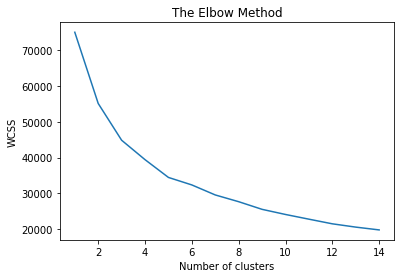

In [11]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(d)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 15):
  kmeans = KMeans(n_clusters = k).fit(d)  
  preds = kmeans.fit_predict(d)
  sil.append(silhouette_score(d, preds, metric = 'euclidean'))


plt.plot(range(2, 15), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

KeyboardInterrupt: 

In [ ]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0).fit_predict(d)
kms = KMeans(n_clusters = 5, random_state = 0).fit(d)
pd.DataFrame(kms.cluster_centers_, columns = ['Sex','Age','Education','Satisfaction_with_life','Employment_status','Religion','Interpersonal_trust','dSatisfaction_with_financial_situation_of_household']).round(2)

In [ ]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0).fit_predict(d)
kms = KMeans(n_clusters = 5, random_state = 0).fit(d)
pd.DataFrame(kms.cluster_centers_, columns = ['Sex','Age','Education','Satisfaction_with_life','Employment_status','Religion','Interpersonal_trust','dSatisfaction_with_financial_situation_of_household'])

In [ ]:
# Less features
X = d[:, [0, 5, 6]]

In [ ]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 4, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Sex','Religion','Interpersonal_trust']).round()